!pip install fredapi

!pip install yfinance

In [1]:
from fredapi import Fred
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
fred = Fred(api_key = "ed1b2123fc23b6e2a2d8db120bb68b7b")

Variable Name:

Initial claim (ICSA) (Weekly) : A claim filed by an unemployed individual after a separation from an employer. The claim requests a determination of basic eligibility for the Unemployment Insurance program.

cpi (CPIAUCSL) (Monthly):

term_srpead (T10Y3M) (Daily): 10-Year Treasury Yield minus 3-Month Treasury Yield

dgs10 (DGS10) (Daily): 10-Year Treasury Constant Maturity Rate

credit_spred (BAA10YM) (Monthly): Corporate Bond Yield minus 10-Year Treasury Yield 

sp500 (^GDPC) (Daily):

SGIXSENT (Daily): Sentiment Index

VIX :

VIX_retrun :


In [3]:
series_ids = {
    "initial_claims": "ICSA",
    "cpi": "CPIAUCSL",
    "term_spread": "T10Y3M",
    "dgs10": "DGS10",
    "credit_spread": "BAA10YM",
} 
data = {}
for name, sid in series_ids.items():
    s = fred.get_series(sid)
    s.name = name 
    data[name] = fred.get_series(sid)
    
df = pd.DataFrame(data)
df = df[(df.index >= "2018-01-01") & (df.index <= "2025-10-30")]
full_index = pd.date_range(start="2018-01-01", end="2025-10-30", freq="D")
df = df.reindex(full_index)
print(df.head(60)) 

            initial_claims      cpi  term_spread  dgs10  credit_spread
2018-01-01             NaN  248.859          NaN    NaN           1.68
2018-01-02             NaN      NaN         1.02   2.46            NaN
2018-01-03             NaN      NaN         1.03   2.44            NaN
2018-01-04             NaN      NaN         1.05   2.46            NaN
2018-01-05             NaN      NaN         1.08   2.47            NaN
2018-01-06        252000.0      NaN          NaN    NaN            NaN
2018-01-07             NaN      NaN          NaN    NaN            NaN
2018-01-08             NaN      NaN         1.04   2.49            NaN
2018-01-09             NaN      NaN         1.11   2.55            NaN
2018-01-10             NaN      NaN         1.13   2.55            NaN
2018-01-11             NaN      NaN         1.11   2.54            NaN
2018-01-12             NaN      NaN         1.12   2.55            NaN
2018-01-13        230000.0      NaN          NaN    NaN            NaN
2018-0

In [4]:
sp500 = yf.download("^GSPC", start="2018-01-01", end="2025-10-30")
sp500 = sp500["Close"]
sp500.name = "sp500"
print(sp500.head(), "\n")
print("Time Periods：", sp500.index.min(), "~", sp500.index.max())

C:\Users\User\AppData\Local\Temp\ipykernel_16544\2462918612.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2018-01-01", end="2025-10-30")
[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC
Date                   
2018-01-02  2695.810059
2018-01-03  2713.060059
2018-01-04  2723.989990
2018-01-05  2743.149902
2018-01-08  2747.709961 

Time Periods： 2018-01-02 00:00:00 ~ 2025-10-29 00:00:00


In [5]:
df_sent = pd.read_excel("C:\\Users\\User\\OneDrive\\Desktop\\SGIXSENT_INDEX_20040115-20252030.xlsx",
                   sheet_name=["20140115_20240115", "20240115_20251030"])
df1 = df_sent["20140115_20240115"]
df2 = df_sent["20240115_20251030"]
def clean_sentiment(df):
    df = df.iloc[1:, 1:3].copy()
    df.columns = ["SGIXSENT", "Date"]
    df["Date"] = pd.to_datetime(df["Date"])
    df["SGIXSENT"] = pd.to_numeric(df["SGIXSENT"], errors="coerce")
    df.set_index("Date", inplace=True)
    return df

df_sent1 = clean_sentiment(df_sent["20140115_20240115"])
df_sent2 = clean_sentiment(df_sent["20240115_20251030"])
df_sent = pd.concat([df_sent1, df_sent2]).sort_index()
print(df_sent.head(10))
print(df_sent.tail(10))

            SGIXSENT
Date                
2014-01-15    243.05
2014-01-16    243.28
2014-01-17    244.07
2014-01-18       NaN
2014-01-19       NaN
2014-01-20       NaN
2014-01-21    244.22
2014-01-22    243.29
2014-01-23    243.48
2014-01-24    241.80
            SGIXSENT
Date                
2025-10-21    353.69
2025-10-22    352.76
2025-10-23    351.30
2025-10-24    350.91
2025-10-25       NaN
2025-10-26       NaN
2025-10-27    351.19
2025-10-28    352.30
2025-10-29    351.29
2025-10-30    349.96


In [6]:
df_sent = df_sent.loc["2018-01-01" : "2025-10-30"]
print(df_sent.head())
print(df_sent.tail())

            SGIXSENT
Date                
2018-01-01       NaN
2018-01-02    315.61
2018-01-03    315.61
2018-01-04    317.07
2018-01-05    318.38
            SGIXSENT
Date                
2025-10-26       NaN
2025-10-27    351.19
2025-10-28    352.30
2025-10-29    351.29
2025-10-30    349.96


In [7]:
vix = fred.get_series(
    "VIXCLS",
    observation_start="2018-01-01",
    observation_end="2025-10-30"
)
df_vix = pd.DataFrame(vix, columns=["VIX"])
df_vix.index = pd.to_datetime(df_vix.index)
print(df_vix.head(30))
print(df_vix.tail(30))

              VIX
2018-01-01    NaN
2018-01-02   9.77
2018-01-03   9.15
2018-01-04   9.22
2018-01-05   9.22
2018-01-08   9.52
2018-01-09  10.08
2018-01-10   9.82
2018-01-11   9.88
2018-01-12  10.16
2018-01-15    NaN
2018-01-16  11.66
2018-01-17  11.91
2018-01-18  12.22
2018-01-19  11.27
2018-01-22  11.03
2018-01-23  11.10
2018-01-24  11.47
2018-01-25  11.58
2018-01-26  11.08
2018-01-29  13.84
2018-01-30  14.79
2018-01-31  13.54
2018-02-01  13.47
2018-02-02  17.31
2018-02-05  37.32
2018-02-06  29.98
2018-02-07  27.73
2018-02-08  33.46
2018-02-09  29.06
              VIX
2025-09-19  15.45
2025-09-22  16.10
2025-09-23  16.64
2025-09-24  16.18
2025-09-25  16.74
2025-09-26  15.29
2025-09-29  16.12
2025-09-30  16.28
2025-10-01  16.29
2025-10-02  16.63
2025-10-03  16.65
2025-10-06  16.37
2025-10-07  17.24
2025-10-08  16.30
2025-10-09  16.43
2025-10-10  21.66
2025-10-13  19.03
2025-10-14  20.81
2025-10-15  20.64
2025-10-16  25.31
2025-10-17  20.78
2025-10-20  18.23
2025-10-21  17.87
2025-10-22

In [8]:
dif_vix = df_vix.sort_index()
print(df_vix.isna().sum())

VIX    49
dtype: int64


In [9]:
missing_dates =  df_vix[df_vix["VIX"].isna()].index
print(missing_dates)

DatetimeIndex(['2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30',
               '2018-05-28', '2018-07-04', '2018-09-03', '2018-11-22',
               '2018-12-05', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04',
               '2019-09-02', '2019-11-28', '2019-12-25', '2020-01-01',
               '2020-01-20', '2020-02-17', '2020-04-10', '2020-05-25',
               '2020-07-03', '2020-09-07', '2020-11-26', '2020-12-25',
               '2021-01-01', '2021-01-18', '2021-02-15', '2021-04-02',
               '2021-05-31', '2021-07-05', '2021-09-06', '2021-11-25',
               '2021-12-24', '2022-01-17', '2022-02-21', '2022-04-15',
               '2022-12-26', '2023-01-02', '2023-04-07', '2023-12-25',
               '2024-01-01', '2024-03-29', '2024-12-25', '2025-01-01',
               '2025-04-18'],
              dtype='datetime64[ns]', freq=None)


In [10]:
df_vix = df_vix.dropna(subset=["VIX"])

In [11]:
df_vix["VIX_return"] = np.log(df_vix["VIX"] / df_vix["VIX"].shift(1))

In [12]:
print(df_vix)

              VIX  VIX_return
2018-01-02   9.77         NaN
2018-01-03   9.15   -0.065563
2018-01-04   9.22    0.007621
2018-01-05   9.22    0.000000
2018-01-08   9.52    0.032020
...           ...         ...
2025-10-24  16.37   -0.055256
2025-10-27  15.79   -0.036074
2025-10-28  16.42    0.039123
2025-10-29  16.92    0.029996
2025-10-30  16.91   -0.000591

[1995 rows x 2 columns]


In [13]:
dif_vix = df_vix.sort_index()
print(df_vix.isna().sum())

VIX           0
VIX_return    1
dtype: int64


In [14]:
df_vix.index = pd.to_datetime(df_vix.index)
df_sent.index = pd.to_datetime(df_sent.index)
sp500.index = pd.to_datetime(sp500.index)
df.index = pd.to_datetime(df.index)

In [15]:
merged = pd.concat([df_vix, df_sent, sp500, df], axis=1, join="outer")
merged = merged.sort_index()
merged = merged.loc["2018-01-01" : "2025-10-30"]
print(merged.head(30))
print(merged.tail(60))
print(merged.info())

              VIX  VIX_return  SGIXSENT        ^GSPC  initial_claims      cpi  \
2018-01-01    NaN         NaN       NaN          NaN             NaN  248.859   
2018-01-02   9.77         NaN    315.61  2695.810059             NaN      NaN   
2018-01-03   9.15   -0.065563    315.61  2713.060059             NaN      NaN   
2018-01-04   9.22    0.007621    317.07  2723.989990             NaN      NaN   
2018-01-05   9.22    0.000000    318.38  2743.149902             NaN      NaN   
2018-01-06    NaN         NaN       NaN          NaN        252000.0      NaN   
2018-01-07    NaN         NaN       NaN          NaN             NaN      NaN   
2018-01-08   9.52    0.032020    318.38  2747.709961             NaN      NaN   
2018-01-09  10.08    0.057158    317.86  2751.290039             NaN      NaN   
2018-01-10   9.82   -0.026132    316.48  2748.229980             NaN      NaN   
2018-01-11   9.88    0.006091    315.86  2767.560059             NaN      NaN   
2018-01-12  10.16    0.02794

In [16]:
cols_ffill_others = ["SGIXSENT", "cpi", "credit_spread", "term_spread", "dgs10"]
merged_full = merged.copy()
merged_full[cols_ffill_others] = merged_full[cols_ffill_others].ffill()
cutoff = pd.Timestamp("2025-09-22")
s = merged["initial_claims"]
s_b = s.bfill()
s_f = s.ffill()
initial_new = s.copy()
mask_before = initial_new.index < cutoff
initial_new.loc[mask_before] = s_b.loc[mask_before]
mask_after = initial_new.index >= cutoff
initial_new.loc[mask_after] = s_f.loc[mask_after]
merged_full["initial_claims"] = initial_new
merged_trading = merged_full[merged_full["^GSPC"].notna()].copy()
check_cpi = merged_trading["cpi"].notna().astype(int).resample("ME").sum()
print(check_cpi[check_cpi == 0])

Series([], Freq: ME, Name: cpi, dtype: int64)


In [17]:
print(merged_trading.head(30))
print(merged_trading.tail(30))

              VIX  VIX_return  SGIXSENT        ^GSPC  initial_claims      cpi  \
2018-01-02   9.77         NaN    315.61  2695.810059        252000.0  248.859   
2018-01-03   9.15   -0.065563    315.61  2713.060059        252000.0  248.859   
2018-01-04   9.22    0.007621    317.07  2723.989990        252000.0  248.859   
2018-01-05   9.22    0.000000    318.38  2743.149902        252000.0  248.859   
2018-01-08   9.52    0.032020    318.38  2747.709961        230000.0  248.859   
2018-01-09  10.08    0.057158    317.86  2751.290039        230000.0  248.859   
2018-01-10   9.82   -0.026132    316.48  2748.229980        230000.0  248.859   
2018-01-11   9.88    0.006091    315.86  2767.560059        230000.0  248.859   
2018-01-12  10.16    0.027946    314.88  2786.239990        230000.0  248.859   
2018-01-16  11.66    0.137706    315.54  2776.419922        231000.0  248.859   
2018-01-17  11.91    0.021214    315.27  2802.560059        231000.0  248.859   
2018-01-18  12.22    0.02569

In [18]:
merged_trading.isna().any().any()
merged_trading.isna().sum()

VIX               0
VIX_return        1
SGIXSENT          0
^GSPC             0
initial_claims    0
cpi               0
term_spread       0
dgs10             0
credit_spread     0
dtype: int64

In [42]:
merged_trading["VIX_return"] = merged_trading["VIX_return"]

In [43]:
merged_trading.to_csv("merged_trading.csv", index=True)

I applied **front-fill** for `"SGIXSENT"`, `"cpi"`, and `"credit_spread"`.  

For `"Initial_Claims"`, I used **back-fill** before *2025-09-22*, since the data is published every Saturday (this is the most recent release available from FRED).  
After *2025-09-22*, I switched to **front-fill** for `"Initial_Claims"`.  

In addition, `"VIX_return"`  had no value on *2018-01-02* due to the calculation method, so I assigned it a value of **0** in the CSV file.

Also, I removed daily observations where the **U.S. stock market was closed**, keeping only the dates when the S&P 500 (`^GSPC`) had available data.

2025-10-13 (Columbus Day) :The stock market remains open, but the bond market is closed. So I frontfill **term_spread**, **dgs10** for this day.

In [45]:
merged_trading.index.to_series().diff().value_counts()

1 days    1538
3 days     355
4 days      53
2 days      21
Name: count, dtype: int64

In [46]:
1538 + 355 +53 + 21 # Confirm trading Days

1967

In [47]:
print(merged_trading.describe().T)

                 count           mean            std            min  \
VIX             1968.0      19.804970       7.522119       9.150000   
VIX_return      1968.0      -0.000036       0.081674      -0.442449   
SGIXSENT        1968.0     350.276336      23.036526     304.840000   
^GSPC           1968.0    4087.277214    1117.019772    2237.399902   
initial_claims  1968.0  396976.117886  618484.190080  189000.000000   
cpi             1968.0     282.792757      26.045111     248.859000   
term_spread     1968.0       0.194284       0.988007      -1.890000   
dgs10           1968.0       2.819700       1.256723       0.520000   
credit_spread   1968.0       2.014121       0.395888       1.410000   

                          25%            50%            75%           max  
VIX                 14.800000      17.910000      22.652500  8.269000e+01  
VIX_return          -0.044879      -0.007904       0.034428  7.682450e-01  
SGIXSENT           339.530000     346.390000     363.210000  

In [31]:
df = merged_trading.copy()

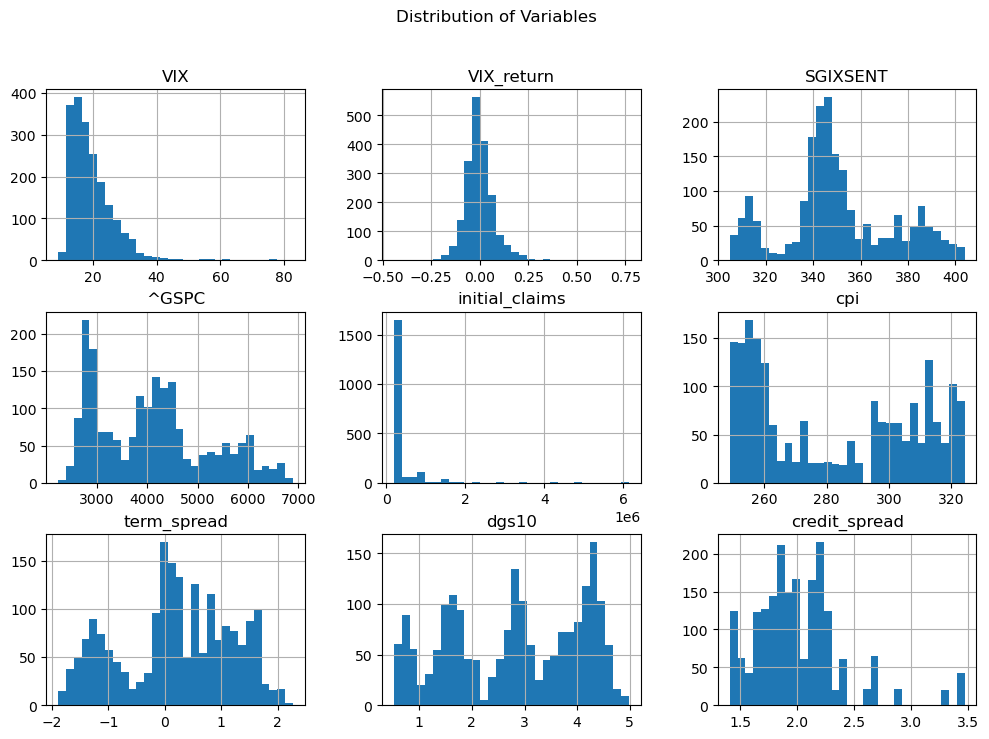

In [32]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Variables")
plt.show()

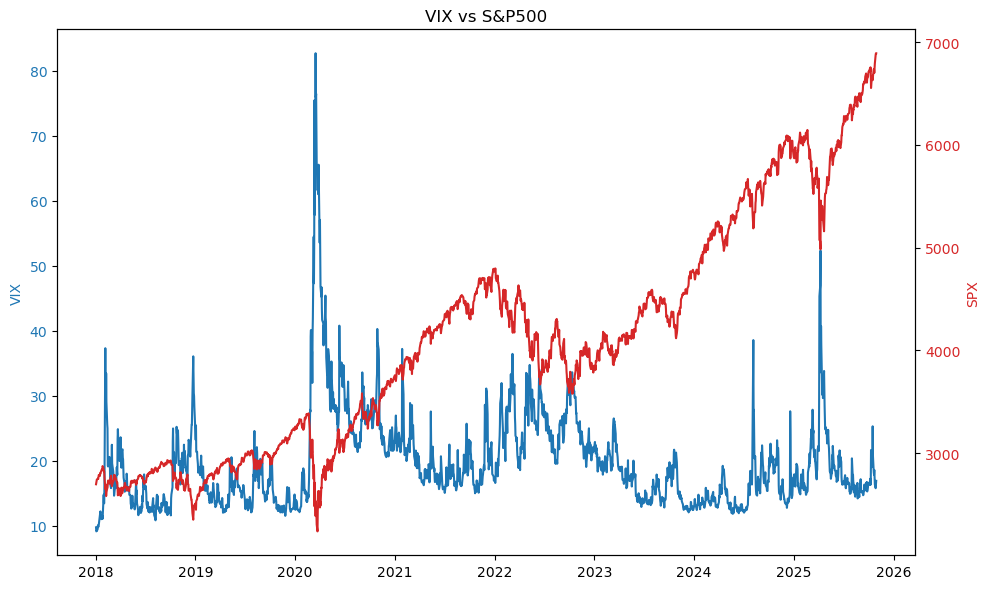

In [48]:

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df.index, df["VIX"], color="tab:blue", label="VIX")
ax1.set_ylabel("VIX", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df.index, df["^GSPC"], color="tab:red", label="SPX (^GSPC)")
ax2.set_ylabel("SPX", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.title("VIX vs S&P500")
fig.tight_layout()
plt.show()

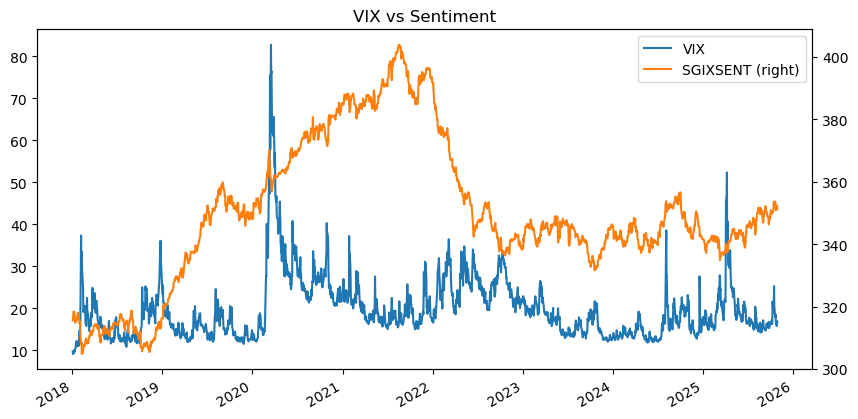

In [34]:
df[["VIX", "SGIXSENT"]].plot(secondary_y="SGIXSENT", figsize=(10, 5))
plt.title("VIX vs Sentiment")
plt.show()

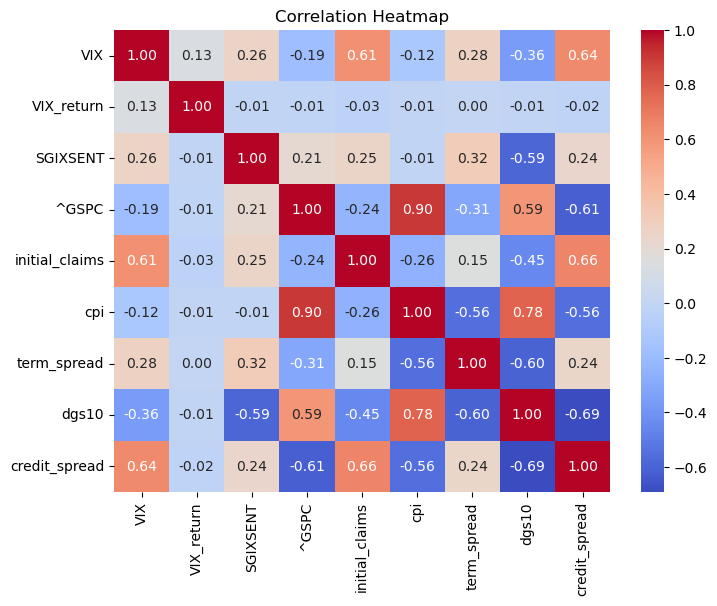

In [35]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

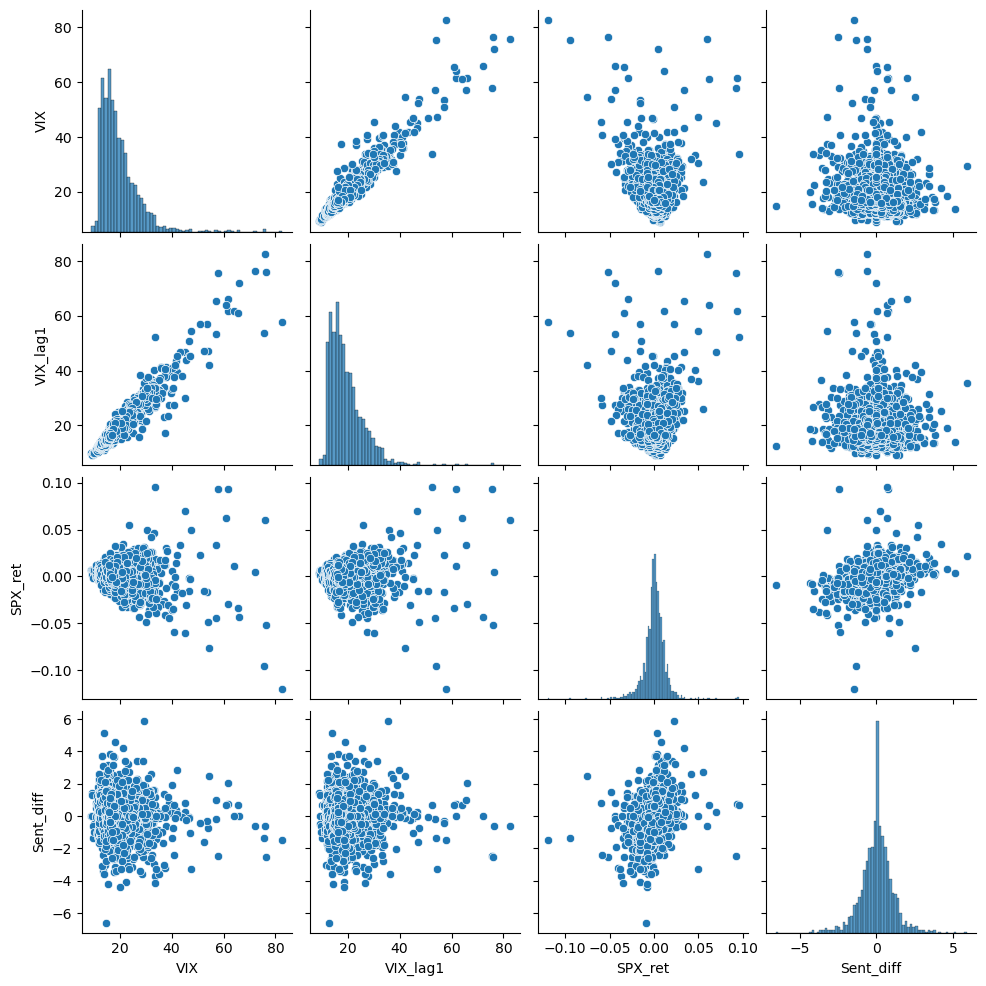

In [38]:
df["VIX_lag1"] = df["VIX"].shift(1)
df["SPX_ret"] = df["^GSPC"].pct_change()
df["Sent_diff"] = df["SGIXSENT"].diff()
sns.pairplot(df[["VIX", "VIX_lag1", "SPX_ret", "Sent_diff"]].dropna())
plt.show()